# Car Price Prediction project using Multiple Linear Regression

## Execution Process
 1. Importing the dataset

 2. Data preprocessing

 3. Feature Engineering

 4. Visualization

 5. Model building using Multiple Linear Regression

 6. Model evaluation

 7. Saving the model

 8. Streamlit deployment

# 1. Import Required Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset

In [64]:
df = pd.read_csv('car_data_set.csv')

## 2. Data preprocessing

In [65]:
df.head()

,Brand,Year,Selling_Price,KM_Driven,Fuel
0,Maruti,2007,60000,70000,Petrol
1,Maruti,2007,135000,50000,Petrol
2,Hyundai,2012,600000,100000,Diesel
3,Datsun,2017,250000,46000,Petrol
4,Honda,2014,450000,141000,Diesel


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Year           4340 non-null   int64 
 2   Selling_Price  4340 non-null   int64 
 3   KM_Driven      4340 non-null   int64 
 4   Fuel           4340 non-null   object
dtypes: int64(3), object(2)
memory usage: 169.7+ KB


In [67]:
df.describe()

,Year,Selling_Price,KM_Driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


## Checking the NULL values

In [68]:
df.isnull().sum()

Brand            0
Year             0
Selling_Price    0
KM_Driven        0
Fuel             0
dtype: int64

## Checking the duplicate values

In [69]:
df.duplicated().sum()

np.int64(822)

# 3. Feature Engineering

In [70]:
from sklearn.preprocessing import LabelEncoder
le_brand = LabelEncoder()
le_fuel = LabelEncoder()

df['Brand'] = le_brand.fit_transform(df['Brand'])
df['Fuel'] = le_fuel.fit_transform(df['Fuel'])

In [71]:
df['Brand'] = df['Brand'].astype('category').cat.codes
df['Fuel'] = df['Fuel'].astype('category').cat.codes

# 4. Data Visualization

## A. Selling Price Distribution using Histogram

In [72]:
import plotly.express as px
fig = px.histogram(df, x='Selling_Price',nbins=50,title='Selling Price Distribution',labels={'Selling_Price': 'Selling Price'},template='plotly_white')
fig.update_layout(
    xaxis_title='Selling Price',
    yaxis_title='Count',
    bargap=0.1,
    width=800,
    height=500
)
fig.show()


## B. Selling Price Distribution by Fuel Type


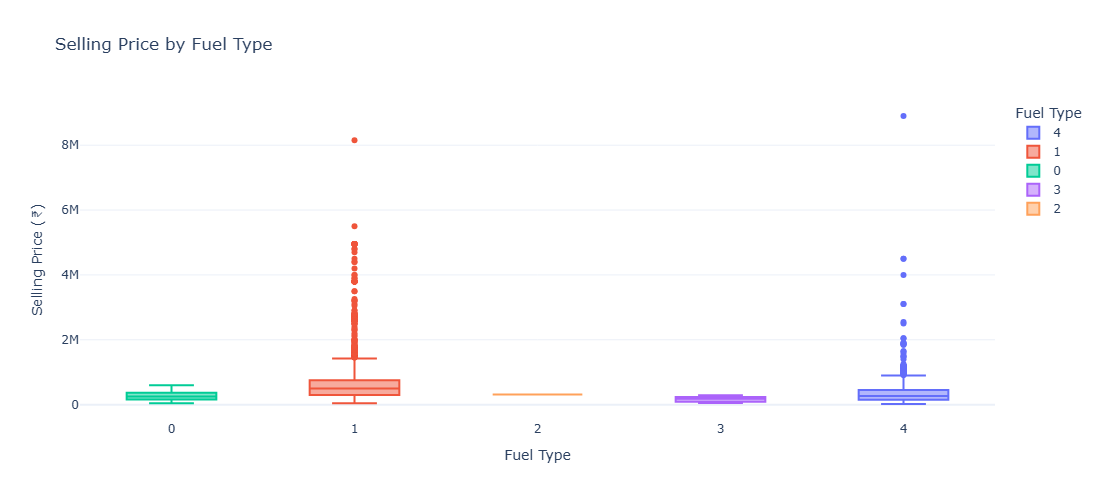

In [73]:
import plotly.express as px
fig = px.box(df,
             x='Fuel',
             y='Selling_Price',
             color='Fuel',
             title='Selling Price by Fuel Type',
             labels={
                 'Fuel': 'Fuel Type',
                 'Selling_Price': 'Selling Price (₹)'
             },
             template='plotly_white',  
             width=800,
             height=500)
fig.update_traces(quartilemethod="inclusive")
fig.show()

# 1A. Multiple Linear Regression Model

## A. Splitting the Dataset

In [74]:
from sklearn.model_selection import train_test_split

X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## B. Train the Model

In [75]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## 6. Model Evaluation

In [76]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² Score: 0.23020021682533653
MSE: 234920020059.23993


Since the R² Score is 0.23020021682533653 the model prediction is less efficient. Hence we need to go for the polynomial regression pipeline

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [78]:
r2 = r2_score(y_test, y_pred)
print(f" R² Score with Polynomial Regression: ",r2)

 R² Score with Polynomial Regression:  0.3103069700042731


#### The R² score is still around 0.32, even after adding polynomial features, it means that your multiple linear regression model is underfitting the data. we can switch from Multiple Linear Regression to RandomForest alogrithm

## 7. Save the Model using pickle

In [79]:
import pickle

with open('car_price_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [80]:

with open('brand_encoder.pkl', 'wb') as f:
    pickle.dump(le_brand, f)

with open('fuel_encoder.pkl', 'wb') as f:
    pickle.dump(le_fuel, f)

# 1B. RandomForest Model

### 1A. Random Forest with Hyperparameter Tuning

In [81]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(
    n_estimators=150,       
    max_depth=12,         
    min_samples_split=5,   
    random_state=42
)

In [82]:
brand_encoder = LabelEncoder()
fuel_encoder = LabelEncoder()
df['Brand'] = brand_encoder.fit_transform(df['Brand'])
df['Fuel'] = fuel_encoder.fit_transform(df['Fuel'])

## 1B. Fitting the model

In [83]:
random_forest_model.fit(X_train, y_train)
y_pred = model.predict(X_test)


 ## 1C. Evaluation

In [84]:
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.23020021682533653
MSE: 234920020059.23993


## 1D. Saving the models and Encoders

In [85]:
import pickle
with open("car_price_model_random_forest_model.pkl", "wb") as f:
    pickle.dump(random_forest_model, f)
with open("brand_encoder_random_forest_model.pkl", "wb") as f:
    pickle.dump(brand_encoder, f)
with open("fuel_encoder_random_forest_model.pkl", "wb") as f:
    pickle.dump(fuel_encoder, f)

## Performed the following steps:

* Cleaned and encoded categorical data using Label Encoding.

* Created visualizations to understand feature relationships.

* Trained and evaluated a Multiple Linear Regression model.

* Achieved performance metrics such as R² Score and Mean Squared Error (MSE) to assess accuracy.

* Trained and evaluated a RandomForest model

* Saved the model using Pickle and deployed it through a Streamlit web application, allowing users to input features and receive real-time price predictions.